In [ ]:
# 먼저 전 영업일을 입력해주세요.

biz_day = '20241015'

In [ ]:
# [12025] 업종분류 현황
# http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020506

import requests as rq
from io import BytesIO
import pandas as pd

gen_otp_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
gen_otp_stk = {
    'mktId': 'STK',
    'trdDd': biz_day,
    'money': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT03901'
}
headers = {'Referer':'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader','User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}
otp_stk = rq.post(gen_otp_url, gen_otp_stk, headers=headers).text

down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
down_sector_stk = rq.post(down_url, {'code': otp_stk}, headers=headers)
sector_stk = pd.read_csv(BytesIO(down_sector_stk.content), encoding='EUC-KR')

gen_otp_ksq = {
    'mktId': 'KSQ',
    'trdDd': biz_day,
    'money': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT03901'
}
otp_ksq = rq.post(gen_otp_url, gen_otp_ksq, headers=headers).text

down_sector_ksq = rq.post(down_url, {'code': otp_ksq}, headers=headers)
sector_ksq = pd.read_csv(BytesIO(down_sector_ksq.content), encoding='EUC-KR')

krx_sector = pd.concat([sector_stk, sector_ksq]).reset_index(drop=True)
krx_sector['종목명'] = krx_sector['종목명'].str.strip()
krx_sector['기준일'] = biz_day

In [ ]:
krx_sector

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액,기준일
0,095570,AJ네트웍스,KOSPI,서비스업,4855,10,0.21,219702144945,20241015
1,006840,AK홀딩스,KOSPI,기타금융,13190,240,1.85,174735329590,20241015
2,027410,BGF,KOSPI,기타금융,3590,5,0.14,343623279690,20241015
3,282330,BGF리테일,KOSPI,유통업,112600,-900,-0.79,1946167815600,20241015
4,138930,BNK금융지주,KOSPI,기타금융,9450,70,0.75,3028127070150,20241015
...,...,...,...,...,...,...,...,...,...
2707,024060,흥구석유,KOSDAQ,유통,17800,-2050,-10.33,267000000000,20241015
2708,010240,흥국,KOSDAQ,기계·장비,5020,-30,-0.59,61859933920,20241015
2709,189980,흥국에프엔비,KOSDAQ,음식료·담배,1828,-2,-0.11,73371947756,20241015
2710,037440,희림,KOSDAQ,기타서비스,5110,10,0.20,71143847250,20241015


In [ ]:
# [12021] PER/PBR/배당수익률(개별종목)
# http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020502

gen_otp_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
gen_otp_data = {
    'searchType': '1',
    'mktId': 'ALL',
    'trdDd': biz_day,
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT03501'
}
headers = {'Referer':'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader', 'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}
otp = rq.post(gen_otp_url, gen_otp_data, headers=headers).text

down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
krx_ind = rq.post(down_url, {'code': otp}, headers=headers)

krx_ind = pd.read_csv(BytesIO(krx_ind.content), encoding='EUC-KR')
krx_ind['종목명'] = krx_ind['종목명'].str.strip()
krx_ind['기준일'] = biz_day

In [ ]:
krx_ind

,종목코드,종목명,종가,대비,등락률,EPS,PER,선행 EPS,선행 PER,BPS,PBR,주당배당금,배당수익률,기준일
0,060310,3S,2160,-20,-0.92,54.0,40.00,NaN,NaN,998.0,2.16,0,0.00,20241015
1,095570,AJ네트웍스,4855,10,0.21,367.0,13.23,778.0,6.24,9326.0,0.52,270,5.56,20241015
2,006840,AK홀딩스,13190,240,1.85,2635.0,5.01,NaN,NaN,44339.0,0.30,200,1.52,20241015
3,054620,APS,5770,170,3.04,667.0,8.65,NaN,NaN,11683.0,0.49,0,0.00,20241015
4,265520,AP시스템,18820,-310,-1.62,3997.0,4.71,NaN,NaN,21396.0,0.88,270,1.43,20241015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,000540,흥국화재,3530,10,0.28,4664.0,0.76,NaN,NaN,20881.0,0.17,0,0.00,20241015
2658,000545,흥국화재우,5490,-10,-0.18,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,20241015
2659,003280,흥아해운,2075,-10,-0.48,142.0,14.61,NaN,NaN,690.0,3.01,0,0.00,20241015
2660,037440,희림,5110,10,0.20,489.0,10.45,NaN,NaN,5583.0,0.92,150,2.94,20241015


먼저 두 데이터에 공통으로 존재하지 않는 종목, 즉 하나의 데이터에만 존재하는 종목을 살펴보도록 하자.

In [ ]:
diff = list(set(krx_sector['종목명']).symmetric_difference(set(krx_ind['종목명'])))
print(diff)

['롯데리츠', '신한서부티엔디리츠', '잉글우드랩', '맥쿼리인프라', '이지스밸류리츠', '한국ANKOR유전', 'NH프라임리츠', '한화리츠', '오가닉티코스메틱', '글로벌에스엠', '신한글로벌액티브리츠', 'NH올원리츠', 'SBI핀테크솔루션즈', 'KB스타리츠', '프레스티지바이오파마', '애머릿지', 'SK리츠', '케이탑리츠', '컬러레이', '엑세스바이오', '미래에셋글로벌리츠', '네오이뮨텍', '엘브이엠씨홀딩스', '에이리츠', '이스트아시아홀딩스', '스타에스엠리츠', 'JTC', '코람코더원리츠', '헝셩그룹', '마스턴프리미어리츠', '삼성FN리츠', '이지스레지던스리츠', '맵스리얼티1', '크리스탈신소재', 'ESR켄달스퀘어리츠', '씨엑스아이', '이리츠코크렙', '소마젠', '코오롱티슈진', '골든센츄리', '윙입푸드', '신한알파리츠', '고스트스튜디오', '미래에셋맵스리츠', '한국패러랠', '로스웰', '디앤디플랫폼리츠', 'GRT', '제이알글로벌리츠', '코람코라이프인프라리츠']


두 데이터의 종목명 열을 세트 형태로 변경한 후 `symmetric_difference()` 메서드를 통해 하나의 데이터에만 있는 종목을 살펴보면 위와 같다. 해당 종목들은 선박펀드, 광물펀드, 해외종목 등 일반적이지 않은 종목들이다. 다음으로 두 데이터를 합쳐준다.

이제 두개 테이블을 하나로 합친다.

In [ ]:
krx_sector.columns.intersection(
                          krx_ind.columns).tolist()

['종목코드', '종목명', '종가', '대비', '등락률', '기준일']

In [ ]:
kor_ticker = pd.merge(krx_sector,
                      krx_ind,
                      on=krx_sector.columns.intersection(
                          krx_ind.columns).tolist(),
                      how='outer')

In [ ]:
kor_ticker

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액,기준일,EPS,PER,선행 EPS,선행 PER,BPS,PBR,주당배당금,배당수익률
0,000020,동화약품,KOSPI,의약품,7910,140,1.80,220937927700,20241015,991.0,7.98,NaN,NaN,13413.0,0.59,180.0,2.28
1,000040,KR모터스,KOSPI,운수장비,509,-8,-1.55,30607629812,20241015,NaN,NaN,NaN,NaN,618.0,0.82,0.0,0.00
2,000050,경방,KOSPI,유통업,6190,-10,-0.16,169700521300,20241015,NaN,NaN,NaN,NaN,29623.0,0.21,125.0,2.02
3,000070,삼양홀딩스,KOSPI,기타금융,78200,-600,-0.76,669725992200,20241015,22269.0,3.51,NaN,NaN,257475.0,0.30,3500.0,4.48
4,000075,삼양홀딩스우,KOSPI,기타금융,57300,100,0.17,17422523400,20241015,NaN,NaN,NaN,NaN,NaN,NaN,3550.0,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,950170,JTC,KOSDAQ,유통,4205,-75,-1.75,217593393340,20241015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2708,950190,고스트스튜디오,KOSDAQ,출판·매체복제,10870,-10,-0.09,147613426040,20241015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2709,950200,소마젠,KOSDAQ,기타서비스,4600,110,2.45,88485843800,20241015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2710,950210,프레스티지바이오파마,KOSPI,서비스업,14650,490,3.46,880408670750,20241015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이번에는 일반적인 종목과 스팩, 우선주, 리츠, 기타 주식을 구분해주도록 한다.

In [ ]:
kor_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    2712 non-null   object 
 1   종목명     2712 non-null   object 
 2   시장구분    2712 non-null   object 
 3   업종명     2712 non-null   object 
 4   종가      2712 non-null   int64  
 5   대비      2712 non-null   int64  
 6   등락률     2712 non-null   float64
 7   시가총액    2712 non-null   int64  
 8   기준일     2712 non-null   object 
 9   EPS     1516 non-null   float64
 10  PER     1516 non-null   float64
 11  선행 EPS  560 non-null    float64
 12  선행 PER  560 non-null    float64
 13  BPS     2429 non-null   float64
 14  PBR     2429 non-null   float64
 15  주당배당금   2662 non-null   float64
 16  배당수익률   2662 non-null   float64
dtypes: float64(9), int64(3), object(5)
memory usage: 360.3+ KB


In [ ]:
import numpy as np

kor_ticker['종목구분'] = np.where(kor_ticker['종목명'].str.contains('스팩|제[0-9]+호'), '스팩',
                              np.where(kor_ticker['종목코드'].str[-1:] != '0', '우선주',
                                       np.where(kor_ticker['종목명'].str.endswith('리츠'), '리츠',
                                                np.where(kor_ticker['종목명'].isin(diff),  '기타',
                                                '보통주'))))
kor_ticker = kor_ticker.reset_index(drop=True)
kor_ticker.columns = kor_ticker.columns.str.replace(' ', '')
kor_ticker = kor_ticker[['종목코드', '종목명', '시장구분', '종가',
                         '시가총액', '기준일', 'EPS', 'BPS', '주당배당금', '종목구분']]

kor_ticker['기준일'] = pd.to_datetime(kor_ticker['기준일'])

In [ ]:
kor_ticker

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,7910,220937927700,2024-10-15,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,509,30607629812,2024-10-15,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,6190,169700521300,2024-10-15,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,78200,669725992200,2024-10-15,22269.0,257475.0,3500.0,보통주
4,000075,삼양홀딩스우,KOSPI,57300,17422523400,2024-10-15,NaN,NaN,3550.0,우선주
...,...,...,...,...,...,...,...,...,...,...
2707,950170,JTC,KOSDAQ,4205,217593393340,2024-10-15,NaN,NaN,NaN,기타
2708,950190,고스트스튜디오,KOSDAQ,10870,147613426040,2024-10-15,NaN,NaN,NaN,기타
2709,950200,소마젠,KOSDAQ,4600,88485843800,2024-10-15,NaN,NaN,NaN,기타
2710,950210,프레스티지바이오파마,KOSPI,14650,880408670750,2024-10-15,NaN,NaN,NaN,기타


이 중에서 보통주만 선택해보도록 하자.

In [ ]:
kor_ticker_select = kor_ticker[kor_ticker['종목구분'] == '보통주']
kor_ticker_select

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,7910,220937927700,2024-10-15,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,509,30607629812,2024-10-15,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,6190,169700521300,2024-10-15,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,78200,669725992200,2024-10-15,22269.0,257475.0,3500.0,보통주
5,000080,하이트진로,KOSPI,20250,1420205622750,2024-10-15,512.0,15694.0,950.0,보통주
...,...,...,...,...,...,...,...,...,...,...
2660,472850,폰드그룹,KOSDAQ,8730,282362535090,2024-10-15,7.0,5789.0,0.0,보통주
2668,475150,SK이터닉스,KOSPI,17240,580848269800,2024-10-15,NaN,NaN,0.0,보통주
2671,476080,M83,KOSDAQ,15190,118254150000,2024-10-15,1094.0,3611.0,0.0,보통주
2688,487570,HS효성,KOSPI,41300,153880785100,2024-10-15,NaN,NaN,0.0,보통주


현재 있는 데이터를 통해 PBR과 ROE를 계산해보자.

In [ ]:
kor_ticker_select['PBR'] = kor_ticker_select['종가'] / kor_ticker_select['BPS']
kor_ticker_select['PER'] = kor_ticker_select['종가'] / kor_ticker_select['EPS']
kor_ticker_select['ROE'] = kor_ticker_select['PBR'] / kor_ticker_select['PER']

kor_ticker_select

<ipython-input-14-4eef5a05d053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kor_ticker_select['PBR'] = kor_ticker_select['종가'] / kor_ticker_select['BPS']
<ipython-input-14-4eef5a05d053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kor_ticker_select['PER'] = kor_ticker_select['종가'] / kor_ticker_select['EPS']
<ipython-input-14-4eef5a05d053>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분,PBR,PER,ROE
0,000020,동화약품,KOSPI,7910,220937927700,2024-10-15,991.0,13413.0,180.0,보통주,0.589726,7.981837,0.073884
1,000040,KR모터스,KOSPI,509,30607629812,2024-10-15,NaN,618.0,0.0,보통주,0.823625,NaN,NaN
2,000050,경방,KOSPI,6190,169700521300,2024-10-15,NaN,29623.0,125.0,보통주,0.208959,NaN,NaN
3,000070,삼양홀딩스,KOSPI,78200,669725992200,2024-10-15,22269.0,257475.0,3500.0,보통주,0.303719,3.511608,0.086490
5,000080,하이트진로,KOSPI,20250,1420205622750,2024-10-15,512.0,15694.0,950.0,보통주,1.290302,39.550781,0.032624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,472850,폰드그룹,KOSDAQ,8730,282362535090,2024-10-15,7.0,5789.0,0.0,보통주,1.508032,1247.142857,0.001209
2668,475150,SK이터닉스,KOSPI,17240,580848269800,2024-10-15,NaN,NaN,0.0,보통주,NaN,NaN,NaN
2671,476080,M83,KOSDAQ,15190,118254150000,2024-10-15,1094.0,3611.0,0.0,보통주,4.206591,13.884826,0.302963
2688,487570,HS효성,KOSPI,41300,153880785100,2024-10-15,NaN,NaN,0.0,보통주,NaN,NaN,NaN


코스피와 코스닥 기준 ROE, PBR의 중위수를 구해보자.

In [ ]:
kor_ticker_select.groupby('시장구분')[['ROE', 'PBR']].max()

,ROE,PBR
시장구분,,
KOSDAQ,0.737440,214.390244
KOSPI,1.061825,34.759801


이제 마법공식을 이용한 종목 선정을 해보자. 먼저 각 종목의 ROE와 PBR의 순위를 구해야 한다.

1. PBR은 낮을수록 좋으므로 오름차순을 한다. (마이너스는 제거되었으므로)
2. ROE는 높을수록 좋으므로 내림차순을 한다.

In [ ]:
kor_ticker_select.loc[:, 'rank_pbr'] = kor_ticker_select['PBR'].rank()
kor_ticker_select.loc[:, 'rank_roe'] = kor_ticker_select['ROE'].rank(ascending = False)

kor_ticker_select

<ipython-input-19-4f36579fe7db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kor_ticker_select.loc[:, 'rank_pbr'] = kor_ticker_select['PBR'].rank()
<ipython-input-19-4f36579fe7db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kor_ticker_select.loc[:, 'rank_roe'] = kor_ticker_select['ROE'].rank(ascending = False)


,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분,PBR,PER,ROE,rank_pbr,rank_roe
0,000020,동화약품,KOSPI,7910,220937927700,2024-10-15,991.0,13413.0,180.0,보통주,0.589726,7.981837,0.073884,721.0,774.0
1,000040,KR모터스,KOSPI,509,30607629812,2024-10-15,NaN,618.0,0.0,보통주,0.823625,NaN,NaN,1086.0,NaN
2,000050,경방,KOSPI,6190,169700521300,2024-10-15,NaN,29623.0,125.0,보통주,0.208959,NaN,NaN,53.0,NaN
3,000070,삼양홀딩스,KOSPI,78200,669725992200,2024-10-15,22269.0,257475.0,3500.0,보통주,0.303719,3.511608,0.086490,183.0,633.0
5,000080,하이트진로,KOSPI,20250,1420205622750,2024-10-15,512.0,15694.0,950.0,보통주,1.290302,39.550781,0.032624,1520.0,1237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,472850,폰드그룹,KOSDAQ,8730,282362535090,2024-10-15,7.0,5789.0,0.0,보통주,1.508032,1247.142857,0.001209,1644.0,1505.0
2668,475150,SK이터닉스,KOSPI,17240,580848269800,2024-10-15,NaN,NaN,0.0,보통주,NaN,NaN,NaN,NaN,NaN
2671,476080,M83,KOSDAQ,15190,118254150000,2024-10-15,1094.0,3611.0,0.0,보통주,4.206591,13.884826,0.302963,2207.0,34.0
2688,487570,HS효성,KOSPI,41300,153880785100,2024-10-15,NaN,NaN,0.0,보통주,NaN,NaN,NaN,NaN,NaN


이제 PBR의 랭크와 ROE를 랭크를 합한 후, 재랭크를 구한다. 그 후 20위 이내인 종목은 'Y' 아니면 'N'이라 표기한다.

In [ ]:
kor_ticker_select.loc[:, 'rank_final'] = (kor_ticker_select.loc[:, 'rank_pbr'] + kor_ticker_select.loc[:, 'rank_roe']).rank()
kor_ticker_select['invest'] = np.where(kor_ticker_select['rank_final'] <= 20, 'Y', 'N')
kor_ticker_select

<ipython-input-20-207c67d55cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kor_ticker_select.loc[:, 'rank_final'] = (kor_ticker_select.loc[:, 'rank_pbr'] + kor_ticker_select.loc[:, 'rank_roe']).rank()
<ipython-input-20-207c67d55cd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kor_ticker_select['invest'] = np.where(kor_ticker_select['rank_final'] <= 20, 'Y', 'N')


,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분,PBR,PER,ROE,rank_pbr,rank_roe,rank_final,invest
0,000020,동화약품,KOSPI,7910,220937927700,2024-10-15,991.0,13413.0,180.0,보통주,0.589726,7.981837,0.073884,721.0,774.0,473.0,N
1,000040,KR모터스,KOSPI,509,30607629812,2024-10-15,NaN,618.0,0.0,보통주,0.823625,NaN,NaN,1086.0,NaN,NaN,N
2,000050,경방,KOSPI,6190,169700521300,2024-10-15,NaN,29623.0,125.0,보통주,0.208959,NaN,NaN,53.0,NaN,NaN,N
3,000070,삼양홀딩스,KOSPI,78200,669725992200,2024-10-15,22269.0,257475.0,3500.0,보통주,0.303719,3.511608,0.086490,183.0,633.0,82.0,N
5,000080,하이트진로,KOSPI,20250,1420205622750,2024-10-15,512.0,15694.0,950.0,보통주,1.290302,39.550781,0.032624,1520.0,1237.0,1352.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,472850,폰드그룹,KOSDAQ,8730,282362535090,2024-10-15,7.0,5789.0,0.0,보통주,1.508032,1247.142857,0.001209,1644.0,1505.0,1448.5,N
2668,475150,SK이터닉스,KOSPI,17240,580848269800,2024-10-15,NaN,NaN,0.0,보통주,NaN,NaN,NaN,NaN,NaN,NaN,N
2671,476080,M83,KOSDAQ,15190,118254150000,2024-10-15,1094.0,3611.0,0.0,보통주,4.206591,13.884826,0.302963,2207.0,34.0,1073.0,N
2688,487570,HS효성,KOSPI,41300,153880785100,2024-10-15,NaN,NaN,0.0,보통주,NaN,NaN,NaN,NaN,NaN,NaN,N


마법공식으로 선택된 20 종목을 확인해보자.

In [ ]:
kor_ticker_select[kor_ticker_select['invest'] == 'Y']

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분,PBR,PER,ROE,rank_pbr,rank_roe,rank_final,invest
37,000540,흥국화재,KOSPI,3530,226776536850,2024-10-15,4664.0,20881.0,0.0,보통주,0.169053,0.756861,0.223361,20.0,93.0,2.0,Y
167,002900,TYM,KOSPI,3120,140558982720,2024-10-15,1390.0,8938.0,160.0,보통주,0.349071,2.244604,0.155516,257.0,233.0,19.0,Y
294,005440,현대지에프홀딩스,KOSPI,4570,712482655570,2024-10-15,12056.0,17334.0,200.0,보통주,0.263644,0.379064,0.695512,122.0,5.0,3.0,Y
322,005990,매일홀딩스,KOSDAQ,8410,115370936640,2024-10-15,3970.0,30646.0,200.0,보통주,0.274424,2.118388,0.129544,138.0,338.0,18.0,Y
387,007860,서연,KOSPI,7330,172107256520,2024-10-15,5174.0,29621.0,150.0,보통주,0.247460,1.416699,0.174673,95.0,173.0,5.0,Y
447,010060,OCI홀딩스,KOSPI,67900,1328394445700,2024-10-15,36540.0,190202.0,3300.0,보통주,0.356989,1.858238,0.192112,272.0,133.0,10.0,Y
578,016710,대성홀딩스,KOSPI,7900,127106726100,2024-10-15,9558.0,26059.0,250.0,보통주,0.303158,0.826533,0.366783,182.0,21.0,4.0,Y
600,017940,E1,KOSPI,75800,519988000000,2024-10-15,36872.0,280943.0,5150.0,보통주,0.269806,2.055760,0.131244,129.0,326.0,15.0,Y
676,024800,유성티엔에스,KOSDAQ,2015,74659401180,2024-10-15,1703.0,12622.0,0.0,보통주,0.159642,1.183206,0.134923,16.0,307.0,8.0,Y
894,039310,세중,KOSDAQ,1650,29900750550,2024-10-15,759.0,5588.0,0.0,보통주,0.295276,2.173913,0.135827,169.0,305.0,17.0,Y


In [ ]:
# CSV로 저장 후 로컬 파일로 저장하기
# 저장 후 왼쪽 메뉴에서 파일 다운로드 가능

kor_ticker_select.to_csv('kor_ticker.csv')

이번에는 모든 종목 대비 선택된 종목들의 `ROE-PBR`이 어디에 분포되어 있는지 확인해보자.

```
이 데이터베이스에서
X축에는 ROE, Y축에는 PBR을 놓고
invest열의 Y와 N에 따라 색깔이 다르게 점도표를 찍고 싶어
데이터를 입력하는 코드는 생략
```

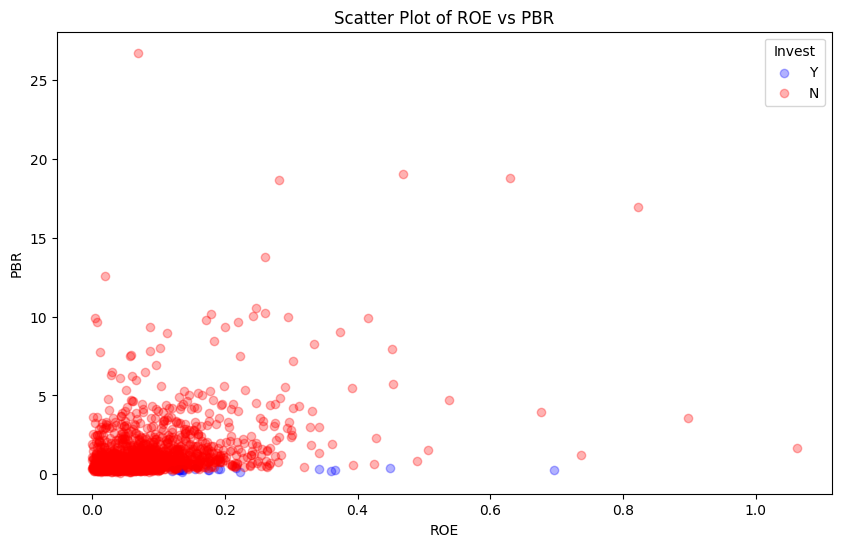

In [ ]:
import matplotlib.pyplot as plt

# Extract relevant columns
kor_ticker_select = kor_ticker_select[['ROE', 'PBR', 'invest']]

# Define colors for the scatter plot
colors = {'Y': 'blue', 'N': 'red'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for invest_status in colors:
    subset = kor_ticker_select[kor_ticker_select['invest'] == invest_status]
    plt.scatter(subset['ROE'], subset['PBR'], c=colors[invest_status], label=invest_status, alpha=0.3)

# Add labels and legend
plt.xlabel('ROE')
plt.ylabel('PBR')
plt.title('Scatter Plot of ROE vs PBR')
plt.legend(title='Invest')

# Show the plot
plt.show()

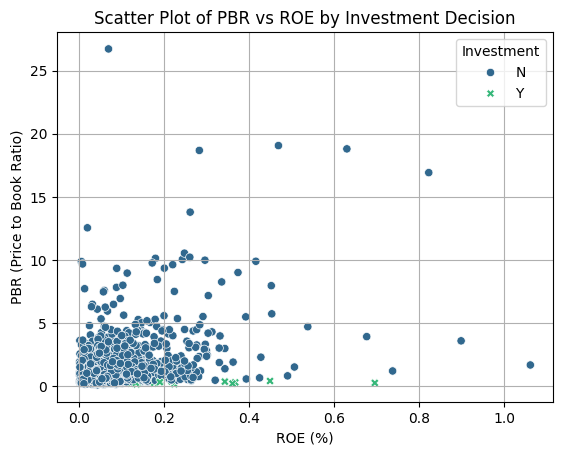

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = kor_ticker_select, x='ROE', y='PBR', hue='invest', style='invest', palette='viridis')

# 그래프 제목과 축 이름 설정
plt.title('Scatter Plot of PBR vs ROE by Investment Decision')
plt.xlabel('ROE (%)')
plt.ylabel('PBR (Price to Book Ratio)')

# 범례 표시
plt.legend(title='Investment')

# 그래프 표시
plt.grid(True)  # 격자 추가
plt.show()

x축과 y축의 범위가 너무 넓어 차이가 잘 보이지 않으며, 색 구분도 잘 되지 않는다. 이를 수정해보자.

```
x축은 0에서 1까지, y축은 0에서 20까지 나타내고 색깔 구분을 더 명확하게 하고 싶어, 점 모양도 다르게 하고 싶어
```

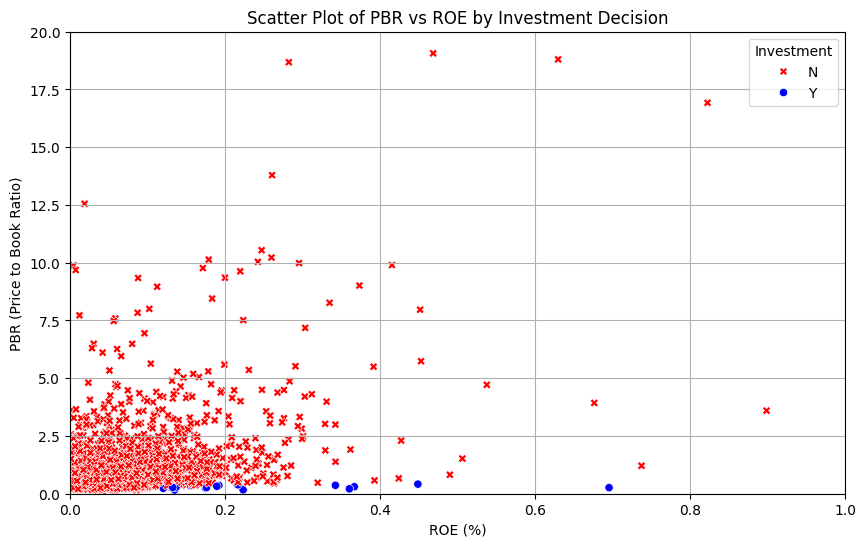

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 색상 및 마커 스타일 설정
palette = {'Y': 'blue', 'N': 'red'}  # Y는 파란색, N은 빨간색으로 설정
markers = {'Y': 'o', 'N': 'X'}  # Y는 원형, N은 X형 마커

# 산점도 그리기
sns.scatterplot(data=kor_ticker_select, x='ROE', y='PBR', hue='invest', style='invest',
                palette=palette, markers=markers)

# X축과 Y축의 범위 설정
plt.xlim(0, 1)  # ROE의 범위를 0에서 1까지 제한
plt.ylim(0, 20)  # PBR의 범위를 0에서 20까지 제한

# 그래프 제목과 축 이름 설정
plt.title('Scatter Plot of PBR vs ROE by Investment Decision')
plt.xlabel('ROE (%)')
plt.ylabel('PBR (Price to Book Ratio)')

# 격자 추가
plt.grid(True)

# 범례 표시
plt.legend(title='Investment')

# 그래프 표시
plt.show()